 # Анализ базы данных для книжного стартапа

Коронавирус застал мир врасплох, изменив привычный порядок вещей. В свободное время жители городов больше не выходят на улицу, не посещают кафе и торговые центры. Зато стало больше времени для книг. Это заметили стартаперы — и бросились создавать приложения для тех, кто любит читать.

Заказчик- компания,которая купила крупный сервис для чтения книг по подписке. 

**Цель**— проанализировать базу данных и  сформулировать ценностное предложение для нового продукта.


**Описание данных:**
В базе данных хранится информация о книгах, издательствах, авторах, а также пользовательские обзоры книг.


**Таблица books** - Содержит данные о книгах:
- book_id — идентификатор книги;
- author_id — идентификатор автора;
- title — название книги;
- num_pages — количество страниц;
- publication_date — дата публикации книги;
- publisher_id — идентификатор издателя.

**Таблица authors** - Содержит данные об авторах:
- author_id — идентификатор автора;
- author — имя автора.

**Таблица publishers**- Содержит данные об издательствах:
- publisher_id — идентификатор издательства;
- publisher — название издательства;

**Таблица ratings**- Содержит данные о пользовательских оценках книг:
- rating_id — идентификатор оценки;
- book_id — идентификатор книги;
- username — имя пользователя, оставившего оценку;
- rating — оценка книги.

**Таблица reviews**- Содержит данные о пользовательских обзорах на книги:
- review_id — идентификатор обзора;
- book_id — идентификатор книги;
- username — имя пользователя, написавшего обзор;
- text — текст обзора.



**Задачи:**
- Посчитать, сколько книг вышло после 1 января 2000 года;
- Для каждой книги посчитать количество обзоров и среднюю оценку;
- Определить издательство, которое выпустило наибольшее число книг толще 50 страниц — так можно  исключить из анализа брошюры;
- Определить автора с самой высокой средней оценкой книг — учитывайть только книги с 50 и более оценками;
- Посчитайть среднее количество обзоров от пользователей, которые поставили больше 48 оценок.

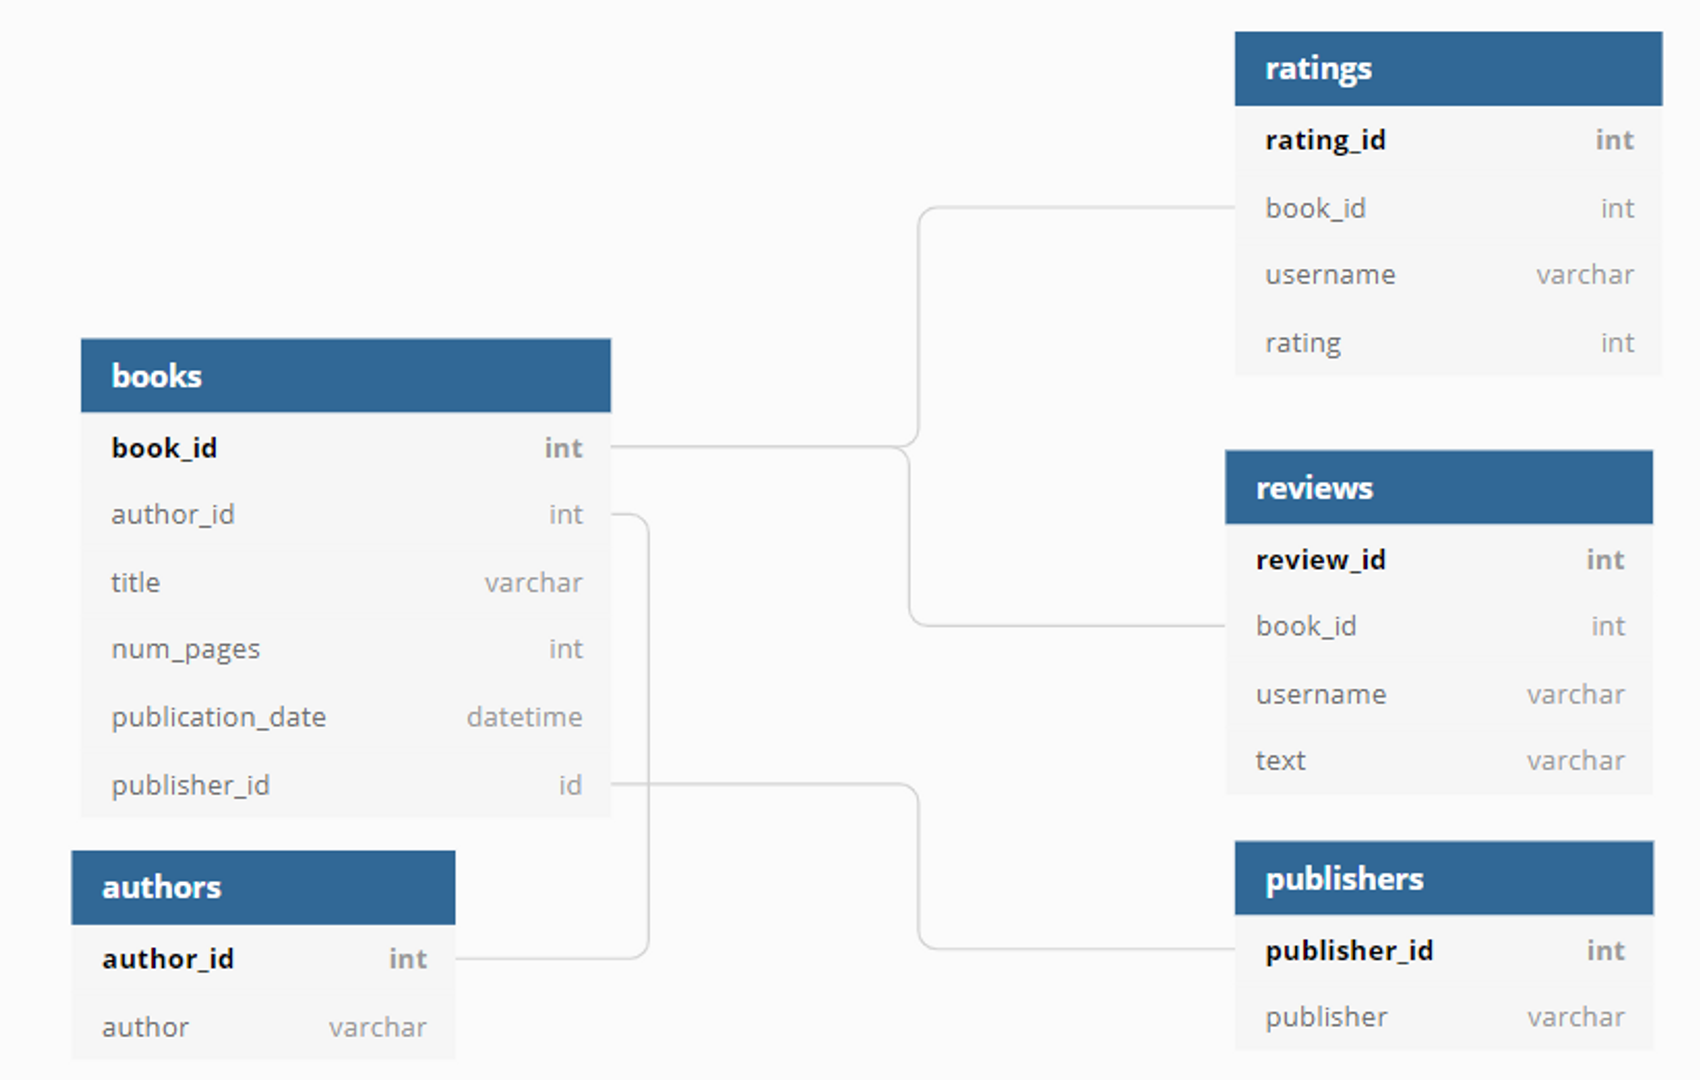

In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import text, create_engine

# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
'pwd': 'Sdf4$2;d-d30pp', # пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения
'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(**db_config)

# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})
con=engine.connect()

In [2]:
# создадим функцию, которая будет принимать переменную с sql-запросом и выводить результат запроса
def result(query):
    return pd.io.sql.read_sql(query, con = engine)

# Знакомство с таблицами

**BOOKS**

In [3]:
query = '''SELECT * FROM books LIMIT 5'''

result(query)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


**AUTHORS**

In [4]:
query = '''SELECT * FROM authors LIMIT 5'''


result(query)

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


**RATINGS**

In [5]:
query = '''SELECT * FROM ratings LIMIT 5'''


result(query)

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


**REVIEWS**

In [6]:
query = '''SELECT * FROM reviews LIMIT 5'''

result(query)

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


**PUBLISHERS**

In [7]:
query = '''SELECT * FROM publishers LIMIT 5'''



result(query)

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


# Задание 1
Посчитать, сколько книг вышло после 1 января 2000 года;

In [9]:
query = '''
select count(book_id)
from books
where publication_date>'2000-01-01'

'''

result(query)

,count
0,819


После 1 января 2000 года в каталоге появилось 819 книг и брошюр.

# Задание 2
Для каждой книги посчитать количество обзоров и среднюю оценку;

In [10]:
query = '''
select b.book_id,
       b.title,
       count(distinct r.review_id) as cnt_review,
       avg(ra.rating) as avg_rate
from ratings as ra
left join books as b on b.book_id=ra.book_id
left join reviews as r on b.book_id=r.book_id
group by b.book_id, b.title
order by avg_rate desc,cnt_review desc;


'''

result(query)

,book_id,title,cnt_review,avg_rate
0,17,A Dirty Job (Grim Reaper #1),4,5.00
1,553,School's Out—Forever (Maximum Ride #2),3,5.00
2,444,Moneyball: The Art of Winning an Unfair Game,3,5.00
3,86,Arrows of the Queen (Heralds of Valdemar #1),2,5.00
4,972,Wherever You Go There You Are: Mindfulness Me...,2,5.00
...,...,...,...,...
995,915,The World Is Flat: A Brief History of the Twen...,3,2.25
996,202,Drowning Ruth,3,2.00
997,316,His Excellency: George Washington,2,2.00
998,371,Junky,2,2.00


 Книга с самым большим количеством обзоров и наивысшим средним рейтингом- A Dirty Job (Grim Reaper)- жанр юмор, приключенческая литература,
 Вторая- книга в научно-фантастическом приключенческом боевике серии Максимальная поездка Джеймса Паттерсона, опубликованная Литтл, Браун. Книга была выпущена в США и Великобритании 23 мая 2006 года. В центре сериала "Стая", группа из шести сверхмощных человеко-птичьих гибридов, скрывающихся от создавших их ученых.
Третья-Moneyball: The Art of Winning an Unfair Game (про то как спортивный менеджер вывел в топ малобюджетную команду,. основана на реальных событиях ).

Как видно , жанры книг с самым высоким рейтингом очень отличаются, тут интересно сколько раз ставили рейтинг вообще, посмотрю дополнительно

In [11]:
query = '''
select b.book_id,
       b.title,     
       count(distinct ra.rating_id) as cnt_rate,
       avg(ra.rating) as avg_rate
from ratings as ra
left join books as b on b.book_id=ra.book_id
group by b.book_id, b.title
order by cnt_rate desc, avg_rate desc
limit 15

'''

result(query)

,book_id,title,cnt_rate,avg_rate
0,948,Twilight (Twilight #1),160,3.662500
1,750,The Hobbit or There and Back Again,88,4.125000
2,673,The Catcher in the Rye,86,3.825581
3,75,Angels & Demons (Robert Langdon #1),84,3.678571
4,302,Harry Potter and the Prisoner of Azkaban (Harr...,82,4.414634
5,299,Harry Potter and the Chamber of Secrets (Harry...,80,4.287500
6,301,Harry Potter and the Order of the Phoenix (Har...,75,4.186667
7,722,The Fellowship of the Ring (The Lord of the Ri...,74,4.391892
8,79,Animal Farm,74,3.729730
9,300,Harry Potter and the Half-Blood Prince (Harry ...,73,4.246575


В топ 15 основной жанр популярная/развлекательная фантастическая художественная литература и антиутопия. Лидер по количеству  проставленных рейтингов первая часть сага Сумерек- от последующих преследователей отрыв по количеству отзывов в 2 раза, хотя рейтинг очень невысокий 3,66. Далее идут 4 части Гарри Поттера, 2 книги про приключения Роберта Лэнгтона (Ангелы и демоны и Код да Винчи), по книги из цткла Влестелин Колец и Хоббита. Представители социальной антиутопии- Дающий,Скотный двори Повелитель мух. Саме высокие рейтингт у книг про Гарри Поттера и Властелина колец.

# Задание 3
Определить издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;

In [12]:
query = '''
select p.publisher_id,
       p.publisher,
       count(b.book_id) as cnt_books
from publishers as p
left join books as b on p.publisher_id=b.publisher_id
where num_pages >= 50 
group by p.publisher_id,p.publisher
order by cnt_books desc
limit 1;

'''
result(query)

,publisher_id,publisher,cnt_books
0,212,Penguin Books,42


 Издательство Penguin Books выпустило 42 книги,  это больше всех остальных издательств.
Penguin Books- британское издательство, основанное в 1935 году в Лондоне сэром Алленом Лейном и его братьями Ричардом и Джоном. 
До середины 1930-х годов книги выпускали в твёрдом переплёте — купить их могли только состоятельные читатели. Британец Аллен Лейн поверил в будущее недорогих изданий, начал печать произведений в мягких обложках и изменил читательские привычки людей.

# Задание 4
Определить автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;

In [14]:
query = '''
select a.author,
       avg(ra.rating) as avg_rate
from authors as a
left join books as b on a.author_id=b.author_id
left join ratings as ra on b.book_id=ra.book_id
where b.book_id in (select ra.book_id
                     from ratings as ra
                     group by ra.book_id
                     having count(ra.rating_id)>=50
                     order by count(rating_id) desc)
group by a.author
order by avg_rate desc
limit 1;

'''
result(query)

,author,avg_rate
0,J.K. Rowling/Mary GrandPré,4.287097


Самая высокая средняя оценка книг - 4,287097. Автором, написавшим эту книгу является J.K.Rowling/Mary GrandPré. По имени J.K.Rowling мы сразу догадываемся, какие  книги выше всего оцениваются и читаются более всего, тут аудитория может быть как подростки, так и молодежь (лица в возрасте от 14 до 35 лет включительно см. закон о молодежной политике) и люди более старшего возраста- вполне могут читать своим детям уже.

Благодаря такому указания авторов(спасибо изданию)Mary GrandPré  тоже обретет большую известность. Mary- американский иллюстратор и писатель, наиболее известная своими иллюстрациями изданий книг о Гарри Поттере в США и Бразилии, опубликованные издательствами Scholastic и Rocco.

# Задание 5
Посчитать среднее количество обзоров от пользователей, которые поставили больше 48 оценок.

In [15]:
query = '''
select avg(rev_cnt)
from
(select count(r.review_id) as rev_cnt,
       r.username
from reviews as r
group by r.username
having username in (select ra.username
                   from ratings as ra
                     group by ra.username
                     having count(ra.rating_id)>48)) as cnt

'''
result(query)

,avg
0,24.0


Пользователи, которые оставили более 48 оценок в среднем написали обзоры 24 раза, то есть почти на каждую вторую книгу.

# Вывод
• После 1 января 2000 года вышло 819 книг 

• Издательство Penguin Books выпустило наибольшее число книг, но для нашего  приложения это не показатель, так как популярность этого издательства обусловлена тем, что они стали выпускать книги не в твердой, а в мягкой обложке, соответсвенно для электронного приложения это не релевантный показатель. Разве что как дополнительная оценка популярности книг, раньше чем более доступная была книга, тем чаще ее могли себе позволить читать где угодно и кто угодно, то есть можно псмотреть на произведения этого издательства и полагать, что они известны больше части читателей молодого и среднего возраста

• Автор J.K. Rowling/Mary GrandPré автор с самой высокой оценкой - средней рейтинг 4.287097 . Теперь вместе с Джоан Роллинг обретет большую популярность и автор иллюстраций к книгам о Гарри Поттере. Как мы видели ранее большое число книг из топ 15- современная полулярная фантастика: Сумерки, Гарри Поттер, Властелин колец, то есть аудитория наша -подростки и молодежь

• Активные пользователи в среднем оценили книги 24 раза. также по данному показателю можно предположить, что так часто оставляют отзывы продвинутые пользователи у которых достаточно времени для этого.